In [1]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [2]:
df_demandas = pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas',
                          index_col='date',
                          parse_dates=True)['demandas']

In [3]:
'''
order(
      p = defini a ordem do polinômio autorregressivo,
      d = defini a ordem do operador de diferença simples,
      q = defini a ordem do polinômio média móvel simples
      )
      
seasonal_order(
               P = defini a ordem do polinômio autorregressivo sazonal,
               D = defini a ordem do operador de diferença sazonal,
               Q = defini a ordem do polinômio média móvel sazonal,
               s = é um inteiro que dá a periodicidade (número de períodos na temporada)
               )
'''
#nosso s seria 52

params={
    'freq':'7d',
    #'tren':'ct',
    'order':(2,0,2),
    #'seasonal_order':(0,1,1,52),
    #'order':(5,1,3),
    #'seasonal_order':(1,1,1,52),
}

In [4]:
df_train, df_test = df_demandas.iloc[:166],df_demandas.iloc[166:]

In [5]:
#model=sm.tsa.statespace.SARIMAX(df_train,**params)
model=sm.tsa.arima.ARIMA(df_train,**params)
results=model.fit()

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)


C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               demandas   No. Observations:                  166
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -241.622
Date:                Tue, 13 Jun 2023   AIC                            495.245
Time:                        11:03:11   BIC                            513.917
Sample:                    01-01-2015   HQIC                           502.824
                         - 03-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.1168      0.070   1423.875      0.000      98.980      99.253
ar.L1          1.9855   8.35e-05   2.38e+04      0.000       1.985       1.986
ar.L2         -1.0000   2.34e-05  -4.27e+04      0.000      -1.000      -1.000
ma.L1         -1.9806      0.178    -11.108      0.000      -2.330      -1.631
ma.L2          0.9931      0.179      5.544      0.000       0.642       1.344
sigma2         0.9768      0.202      4.840      0.000       0.581       1.372
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.87   Prob(JB):                         0.73
Heteroskedasticity (H):               0.74   Skew:                            -0.05
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
previsao_test = results.predict(start=len(df_train),end=len(df_train)+len(df_test)-1,dynamic=True)

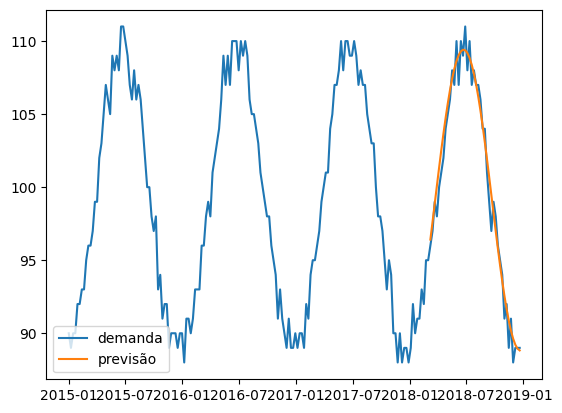

In [8]:
plt.plot(df_demandas,label='demanda')
plt.plot(previsao_test,label='previsão')
plt.legend()

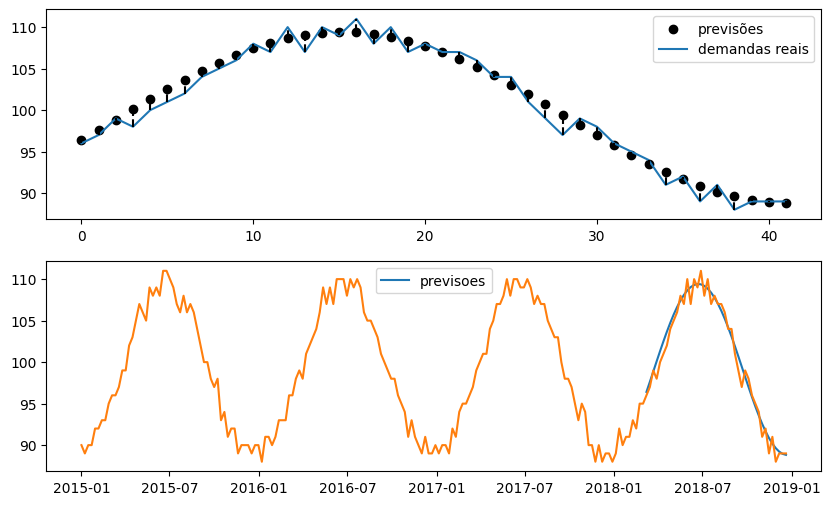

In [9]:
fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(2,1,1)

plt.scatter(range(len(df_test)),previsao_test,label='previsões',color='black')
plt.plot(range(len(df_test)),df_test,label='demandas reais')
plt.legend()

indice = 0 
for i in range(len(previsao_test)):
    if previsao_test[i] > df_test.iloc[i]:
        plt.vlines(x=i, ymin=df_test.iloc[i], ymax=previsao_test[i],linestyle='--',color='black')
    else:
        plt.vlines(x=i, ymin=previsao_test[i], ymax=df_test.iloc[i],linestyle='--',color='black')
    indice+=1

ax=fig.add_subplot(2,1,2)
plt.plot(previsao_test,label='previsoes')
plt.plot(df_demandas)
plt.legend()

In [10]:
import numpy as np

In [11]:
residuos = np.array(df_test)-np.array(previsao_test)

$e_{i} = y_{i}-\hat{y}_{i}\sim N\left(0,30\right)$

In [12]:
import seaborn as sns

In [13]:
normal = np.random.normal(0, 1,2000000)

$\mathbf{IMPORTANTE}$

Em modelos de séries temporais, não existem nenhuma suposição em relação aos resíduos, contudo, sabemos como o nosso resíduo e nossos dados se comportam, suas distribuições e etc, portanto usaremos isso a nosso favor para se construir um bom modelo. Por isso a análise de resíduo a seguir

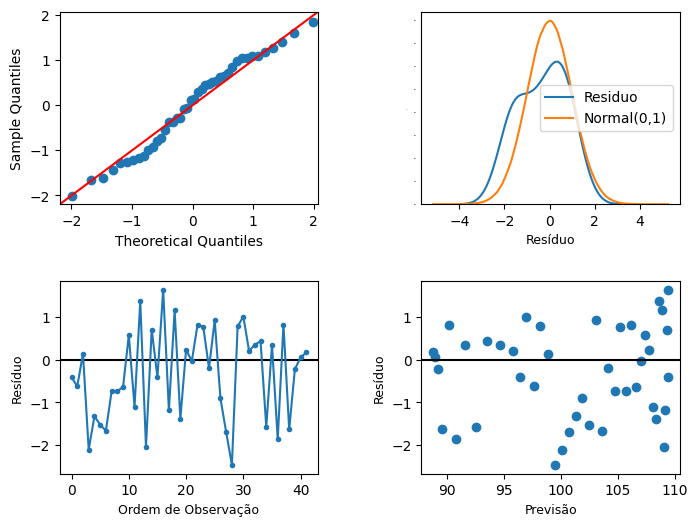

In [14]:
fig=plt.figure(figsize=(8,6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax=fig.add_subplot(2,2,3)
plt. axhline(y=0,xmin=0,xmax=len(previsao_test),color='black')
plt.plot(range(len(residuos)),residuos,marker='.')
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Ordem de Observação',fontsize=9)

ax=fig.add_subplot(2,2,2)
sns.kdeplot(residuos,label="Residuo")
sns.kdeplot(normal,label='Normal(0,1)')
plt.legend()
plt.tick_params(axis='y', labelsize=0, length=0)
plt.ylabel([], fontsize=0)
plt.xlabel('Resíduo',fontsize=9)

ax=fig.add_subplot(2,2,1)
sm.qqplot(residuos,fit=True,line='45',ax=ax)

ax=fig.add_subplot(2,2,4)
plt.scatter(previsao_test,residuos)
plt.axhline(y=0,xmin=0,xmax=len(previsao_test),color='black')
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Previsão',fontsize=9)


plt.show()

In [22]:
import statsmodels.api as sm

#print('MSE_Teste =',sm.tools.eval_measures.mse(previsoes_test, df_test.y, axis=0))

print('RMSE_Teste =',round(sm.tools.eval_measures.rmse(previsao_test, df_test, axis=0),4))

print('MAE_Teste =',round(sm.tools.eval_measures.meanabs(previsao_test, df_test, axis=0),4))

print(f'MAPE_Teste = {round(100*metrics.mean_absolute_percentage_error(df_test, previsao_test),4)}%')

RMSE_Teste = 1.1139
MAE_Teste = 0.9253
MAPE_Teste = 0.9206%


MAE = $\frac{1}{n}\sum_{i=1}^{n}\mid y_{i}-\hat{y}\mid$ 

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}\right)^{2}}$

MAPE = $\frac{1}{n}\sum_{i=1}^{n}\mid \frac{y_{i}-\hat{y}}{y_{i}}\mid$ 

# Fase de Previsão

In [16]:
qtd_previsoes = 52

In [17]:
'''
for i in range(60):
        
    model = sm.tsa.arima.ARIMA(df_demandas,**params)
    results = model.fit()
    previsao = results.predict(start=len(df_demandas),end=len(df_demandas)+qtd_previsoes-1,dynamic=True)
    with open(f"C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Previsoes/Prev_ari/Previsao_ari{i}.txt", "w") as arquivo:
        n = len(previsao)
        for j in range(n-1):
            arquivo.write(f'{previsao[j]}, ')
        arquivo.write(f'{previsao[n-1]}')
'''

'\nfor i in range(60):\n        \n    model = sm.tsa.arima.ARIMA(df_demandas,**params)\n    results = model.fit()\n    previsao = results.predict(start=len(df_demandas),end=len(df_demandas)+qtd_previsoes-1,dynamic=True)\n    with open(f"C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Previsoes/Prev_ari/Previsao_ari{i}.txt", "w") as arquivo:\n        n = len(previsao)\n        for j in range(n-1):\n            arquivo.write(f\'{previsao[j]}, \')\n        arquivo.write(f\'{previsao[n-1]}\')\n'